In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [11]:
fluidanimate_ff = pd.read_csv("fluidanimate/benchmark-gcc-ff.out")
fluidanimate_pthreads = pd.read_csv("fluidanimate/benchmark-gcc-pthreads.out")
fluidanimate_tbb = pd.read_csv("fluidanimate/benchmark-gcc-tbb.out")
serial_time = 287.528
serial_energy = 28227.1

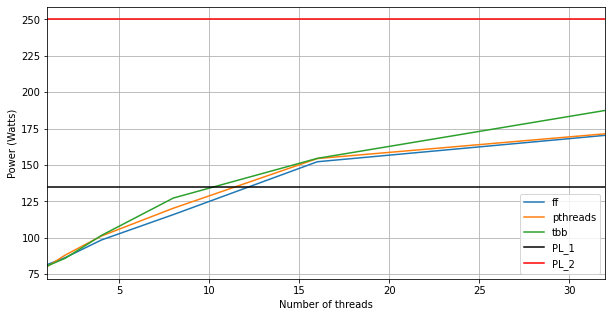

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(fluidanimate_ff.Threads,fluidanimate_ff.JoulesCpuAll/ fluidanimate_ff.Time,label = "ff")
plt.plot(fluidanimate_pthreads.Threads,fluidanimate_pthreads.JoulesCpuAll/ fluidanimate_pthreads.Time,label = "pthreads")
plt.plot(fluidanimate_tbb.Threads,fluidanimate_tbb.JoulesCpuAll/ fluidanimate_tbb.Time,label = "tbb")
plt.axhline(y=135, color='black', linestyle='-', label="PL_1")
plt.xlim([1,32])
plt.axhline(y=250, color='r', linestyle='-', label="PL_2")
plt.xlabel("Number of threads")
plt.ylabel("Power (Watts)")
plt.grid()
plt.legend()
plt.savefig('fluidnaimate_power')
plt.show()

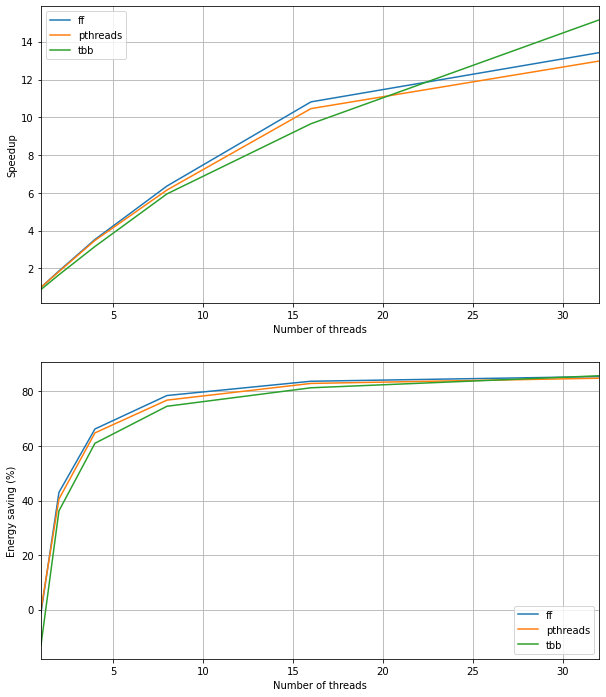

In [13]:
fig, ax = plt.subplots(2,figsize=(10, 12))

ax[0].plot(fluidanimate_ff.Threads, serial_time / fluidanimate_ff.Time, label = "ff")
ax[0].plot(fluidanimate_pthreads.Threads, serial_time / fluidanimate_pthreads.Time,label = "pthreads")
ax[0].plot(fluidanimate_tbb.Threads, serial_time / fluidanimate_tbb.Time,label = "tbb")
ax[0].set_xlabel("Number of threads")
ax[0].set_ylabel("Speedup")
ax[0].set_xlim([1,32])
ax[0].grid()
ax[0].legend()

ax[1].plot(fluidanimate_ff.Threads, (serial_energy - fluidanimate_ff.PCM_energy) / serial_energy *100, label = "ff")
ax[1].plot(fluidanimate_pthreads.Threads, (serial_energy - fluidanimate_pthreads.PCM_energy) / serial_energy *100,label = "pthreads")
ax[1].plot(fluidanimate_tbb.Threads, (serial_energy - fluidanimate_tbb.PCM_energy) / serial_energy *100, label = "tbb")
ax[1].set_xlabel("Number of threads")
ax[1].set_ylabel("Energy saving (%)")
ax[1].set_xlim([1,32])
ax[1].grid()
ax[1].legend()

fig.savefig('fluidanimate_overall')

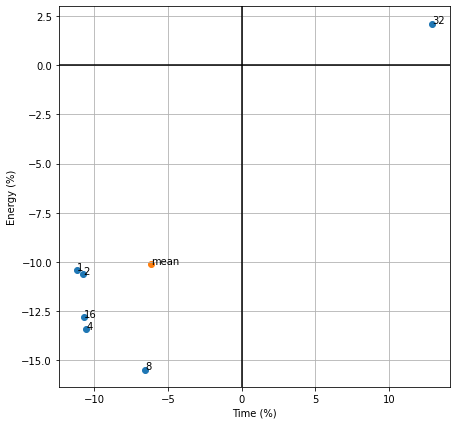

In [17]:
fig, ax = plt.subplots(figsize=(7, 7))

ff_vs_tbb = (fluidanimate_ff - fluidanimate_tbb) / fluidanimate_tbb * 100
ff_vs_tbb[["Time", "PCM_energy"]].to_csv("temp_data", sep='\t')
ax.scatter(ff_vs_tbb.Time, ff_vs_tbb.PCM_energy)
ax.scatter(ff_vs_tbb.Time.mean(), ff_vs_tbb.PCM_energy.mean())
ax.annotate("mean",(ff_vs_tbb.Time.mean(), ff_vs_tbb.PCM_energy.mean()))
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.set_xlabel('Time (%)')
ax.set_ylabel('Energy (%)')
ax.grid()

for i in range(6):
    ax.annotate(fluidanimate_ff.Threads[i], (ff_vs_tbb.Time[i], ff_vs_tbb.PCM_energy[i]))

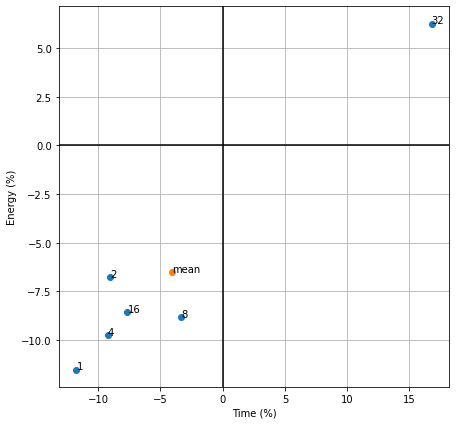

In [16]:
fig, ax = plt.subplots(figsize=(7, 7))

tbb_vs_pthread = (fluidanimate_pthreads - fluidanimate_tbb) / fluidanimate_tbb * 100
tbb_vs_pthread[["Time", "PCM_energy"]].to_csv("temp_data", sep='\t')
ax.scatter(tbb_vs_pthread.Time, tbb_vs_pthread.PCM_energy)
ax.scatter(tbb_vs_pthread.Time.mean(), tbb_vs_pthread.PCM_energy.mean())
ax.annotate("mean",(tbb_vs_pthread.Time.mean(), tbb_vs_pthread.PCM_energy.mean()))
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.set_xlabel('Time (%)')
ax.set_ylabel('Energy (%)')
ax.grid()

for i in range(6):
    ax.annotate(fluidanimate_pthreads.Threads[i], (tbb_vs_pthread.Time[i], tbb_vs_pthread.PCM_energy[i]))